# Regression in Python

***
This is a very quick run-through of some basic statistical concepts, adapted from [Lab 4 in Harvard's CS109](https://github.com/cs109/2015lab4) course. Please feel free to try the original lab if you're feeling ambitious :-) The CS109 git repository also has the solutions if you're stuck.

* Linear Regression Models
* Prediction using linear regression

Linear regression is used to model and predict continuous outcomes with normal random errors. There are nearly an infinite number of different types of regression models and each regression model is typically defined by the distribution of the prediction errors (called "residuals") of the type of data. Logistic regression is used to model binary outcomes whereas Poisson regression is used to predict counts. In this exercise, we'll see some examples of linear regression as well as Train-test splits.

The packages we'll cover are: `statsmodels`, `seaborn`, and `scikit-learn`. While we don't explicitly teach `statsmodels` and `seaborn` in the Springboard workshop, those are great libraries to know.
***

<img width=600 height=300 src="https://imgs.xkcd.com/comics/sustainable.png"/>
***

In [1]:
# special IPython command to prepare the notebook for matplotlib and other libraries
%matplotlib inline 

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn

import seaborn as sns

# special matplotlib argument for improved plots
from matplotlib import rcParams
sns.set_style("whitegrid")
sns.set_context("poster")


***
# Part 1: Introduction to Linear Regression
### Purpose of linear regression
***
<div class="span5 alert alert-info">

<p> Given a dataset containing predictor variables $X$ and outcome/response variable $Y$, linear regression can be used to: </p>
<ul>
  <li> Build a <b>predictive model</b> to predict future values of $\hat{Y}$, using new data $X^*$ where $Y$ is unknown.</li>
  <li> Model the <b>strength of the relationship</b> between each independent variable $X_i$ and $Y$</li>
    <ul>
      <li> Many times, only a subset of independent variables $X_i$ will have a linear relationship with $Y$</li>
      <li> Need to figure out which $X_i$ contributes most information to predict $Y$ </li>
    </ul>
   <li>It is in many cases, the first pass prediction algorithm for continuous outcomes. </li>
</ul>
</div>

### A Brief Mathematical Recap
***

[Linear Regression](http://en.wikipedia.org/wiki/Linear_regression) is a method to model the relationship between a set of independent variables $X$ (also knowns as explanatory variables, features, predictors) and a dependent variable $Y$.  This method assumes the relationship between each predictor $X$ is **linearly** related to the dependent variable $Y$. The most basic linear regression model contains one independent variable $X$, we'll call this the simple model. 

$$ Y = \beta_0 + \beta_1 X + \epsilon$$

where $\epsilon$ is considered as an unobservable random variable that adds noise to the linear relationship. In linear regression, $\epsilon$ is assumed to be normally distributed with a mean of 0. In other words, what this means is that on average, if we know $Y$, a roughly equal number of predictions $\hat{Y}$ will be above $Y$ and others will be below $Y$. That is, on average, the error is zero. The residuals, $\epsilon$ are also assumed to be "i.i.d.": independently and identically distributed. Independence means that the residuals are not correlated -- the residual from one prediction has no effect on the residual from another prediction. Correlated errors are common in time series analysis and spatial analyses.

* $\beta_0$ is the intercept of the linear model and represents the average of $Y$ when all independent variables $X$ are set to 0.

* $\beta_1$ is the slope of the line associated with the regression model and represents the average effect of a one-unit increase in $X$ on $Y$.

* Back to the simple model. The model in linear regression is the *conditional mean* of $Y$ given the values in $X$ is expressed a linear function.  

$$ y = f(x) = E(Y | X = x)$$ 

![conditional mean](images/conditionalmean.png)
*Image from http://www.learner.org/courses/againstallodds/about/glossary.html. Note this image uses $\alpha$ and $\beta$ instead of $\beta_0$ and $\beta_1$.*

* The goal is to estimate the coefficients (e.g. $\beta_0$ and $\beta_1$). We represent the estimates of the coefficients with a "hat" on top of the letter.  

$$ \hat{\beta}_0, \hat{\beta}_1 $$

* Once we estimate the coefficients $\hat{\beta}_0$ and $\hat{\beta}_1$, we can use these to predict new values of $Y$ given new data $X$.

$$\hat{y} = \hat{\beta}_0 + \hat{\beta}_1 x_1$$

* Multiple linear regression is when you have more than one independent variable and the estimation involves matrices
    * $X_1$, $X_2$, $X_3$, $\ldots$


* How do you estimate the coefficients? 
    * There are many ways to fit a linear regression model
    * The method called **least squares** is the most common methods
    * We will discuss least squares

$$ Y = \beta_0 + \beta_1 X_1 + \ldots + \beta_p X_p + \epsilon$$ 
    
### Estimating $\hat\beta$: Least squares
***
[Least squares](http://en.wikipedia.org/wiki/Least_squares) is a method that can estimate the coefficients of a linear model by minimizing the squared residuals: 

$$ \mathscr{L} = \sum_{i=1}^N \epsilon_i^2 = \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2  = \sum_{i=1}^N \left(y_i - \left(\beta_0 + \beta_1 x_i\right)\right)^2 $$

where $N$ is the number of observations and $\epsilon$ represents a residual or error, ACTUAL - PREDICTED.  

#### Estimating the intercept $\hat{\beta_0}$ for the simple linear model

We want to minimize the squared residuals and solve for $\hat{\beta_0}$ so we take the partial derivative of $\mathscr{L}$ with respect to $\hat{\beta_0}$ 

$
\begin{align}
\frac{\partial \mathscr{L}}{\partial \hat{\beta_0}} &= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \epsilon^2 \\
&= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2 \\
&= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right)^2 \\
&= -2 \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right) \hspace{25mm} \mbox{(by chain rule)} \\
&= -2 \sum_{i=1}^N (y_i - \hat{\beta}_0 - \hat{\beta}_1 x_i) \\
&= -2 \left[ \left( \sum_{i=1}^N y_i \right) - N \hat{\beta_0} - \hat{\beta}_1 \left( \sum_{i=1}^N x_i
\right) \right] \\
& 2 \left[ N \hat{\beta}_0 + \hat{\beta}_1 \sum_{i=1}^N x_i - \sum_{i=1}^N y_i \right] = 0 \hspace{20mm} \mbox{(Set equal to 0 and solve for $\hat{\beta}_0$)} \\
& N \hat{\beta}_0 + \hat{\beta}_1 \sum_{i=1}^N x_i - \sum_{i=1}^N y_i = 0 \\
& N \hat{\beta}_0 = \sum_{i=1}^N y_i - \hat{\beta}_1 \sum_{i=1}^N x_i \\
& \hat{\beta}_0 = \frac{\sum_{i=1}^N y_i - \hat{\beta}_1 \sum_{i=1}^N x_i}{N} \\
& \hat{\beta}_0 = \frac{\sum_{i=1}^N y_i}{N} - \hat{\beta}_1 \frac{\sum_{i=1}^N x_i}{N} \\
& \boxed{\hat{\beta}_0 = \bar{y} - \hat{\beta}_1 \bar{x}}
\end{align}
$

Using this new information, we can compute the estimate for $\hat{\beta}_1$ by taking the partial derivative of $\mathscr{L}$ with respect to $\hat{\beta}_1$.

$
\begin{align}
\frac{\partial \mathscr{L}}{\partial \hat{\beta_1}} &= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \epsilon^2 \\
&= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2 \\
&= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right)^2 \\
&= 2 \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right) \left( -x_i \right) \hspace{25mm}\mbox{(by chain rule)} \\
&= -2 \sum_{i=1}^N x_i \left( y_i - \hat{\beta}_0 - \hat{\beta}_1 x_i \right) \\
&= -2 \sum_{i=1}^N x_i (y_i - \hat{\beta}_0 x_i - \hat{\beta}_1 x_i^2) \\
&= -2 \sum_{i=1}^N x_i (y_i - \left( \bar{y} - \hat{\beta}_1 \bar{x} \right) x_i - \hat{\beta}_1 x_i^2) \\
&= -2 \sum_{i=1}^N (x_i y_i - \bar{y}x_i + \hat{\beta}_1\bar{x}x_i - \hat{\beta}_1 x_i^2) \\
&= -2 \left[ \sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i + \hat{\beta}_1\bar{x}\sum_{i=1}^N x_i - \hat{\beta}_1 \sum_{i=1}^N x_i^2 \right] \\
&= -2 \left[ \hat{\beta}_1 \left\{ \bar{x} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i^2 \right\} + \left\{ \sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i \right\}\right] \\
& 2 \left[ \hat{\beta}_1 \left\{ \sum_{i=1}^N x_i^2 - \bar{x} \sum_{i=1}^N x_i \right\} + \left\{ \bar{y} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i y_i \right\} \right] = 0 \\
& \hat{\beta}_1 = \frac{-\left( \bar{y} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i y_i \right)}{\sum_{i=1}^N x_i^2 - \bar{x}\sum_{i=1}^N x_i} \\
&= \frac{\sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i}{\sum_{i=1}^N x_i^2 - \bar{x} \sum_{i=1}^N x_i} \\
& \boxed{\hat{\beta}_1 = \frac{\sum_{i=1}^N x_i y_i - \bar{x}\bar{y}n}{\sum_{i=1}^N x_i^2 - n \bar{x}^2}}
\end{align}
$

The solution can be written in compact matrix notation as

$$\hat\beta =  (X^T X)^{-1}X^T Y$$ 

We wanted to show you this in case you remember linear algebra, in order for this solution to exist we need $X^T X$ to be invertible. Of course this requires a few extra assumptions, $X$ must be full rank so that $X^T X$ is invertible, etc. Basically, $X^T X$ is full rank if all rows and columns are linearly independent. This has a loose relationship to variables and observations being independent respective. **This is important for us because this means that having redundant features in our regression models will lead to poorly fitting (and unstable) models.** We'll see an implementation of this in the extra linear regression example.

***
# Part 2: Exploratory Data Analysis for Linear Relationships

The [Boston Housing data set](https://archive.ics.uci.edu/ml/datasets/Housing) contains information about the housing values in suburbs of Boston.  This dataset was originally taken from the StatLib library which is maintained at Carnegie Mellon University and is now available on the UCI Machine Learning Repository. 


## Load the Boston Housing data set from `sklearn`
***

This data set is available in the [sklearn](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html#sklearn.datasets.load_boston) python module which is how we will access it today.  

In [2]:
from sklearn.datasets import load_boston
import pandas as pd

boston = load_boston()

In [3]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [4]:
boston.data.shape

(506, 13)

In [5]:
# Print column names
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [6]:
# Print description of Boston housing data set
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Now let's explore the data set itself. 

In [7]:
bos = pd.DataFrame(boston.data)
bos.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


There are no column names in the DataFrame. Let's add those. 

In [8]:
bos.columns = boston.feature_names
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


Now we have a pandas DataFrame called `bos` containing all the data we want to use to predict Boston Housing prices.  Let's create a variable called `PRICE` which will contain the prices. This information is contained in the `target` data. 

In [9]:
print(boston.target.shape)

(506,)


In [10]:
bos['PRICE'] = boston.target
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## EDA and Summary Statistics
***

Let's explore this data set.  First we use `describe()` to get basic summary statistics for each of the columns. 

In [11]:
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Scatterplots
***

Let's look at some scatter plots for three variables: 'CRIM' (per capita crime rate), 'RM' (number of rooms) and 'PTRATIO' (pupil-to-teacher ratio in schools).  

Text(0.5, 1.0, 'Relationship between CRIM and Price')

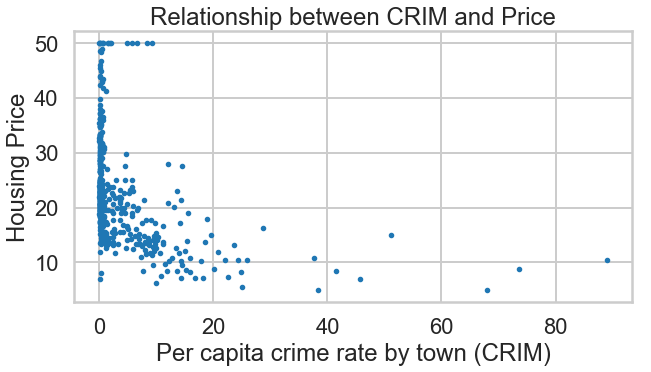

In [12]:
plt.subplots(figsize=(10, 5))
plt.scatter(bos.CRIM, bos.PRICE, marker='.',s=50)
plt.xlabel("Per capita crime rate by town (CRIM)")
plt.ylabel("Housing Price")
plt.title("Relationship between CRIM and Price")

<div class="span5 alert alert-info">
<h3>Part 2 Checkup Exercise Set I</h3>

<p><b>Exercise:</b> What kind of relationship do you see? e.g. positive, negative?  linear? non-linear? Is there anything else strange or interesting about the data? What about outliers?</p>


<p><b>Exercise:</b> Create scatter plots between *RM* and *PRICE*, and *PTRATIO* and *PRICE*. Label your axes appropriately using human readable labels. Tell a story about what you see.</p>

<p><b>Exercise:</b> What are some other numeric variables of interest? Why do you think they are interesting? Plot scatterplots with these variables and *PRICE* (house price) and tell a story about what you see.</p>

</div>

# your turn: describe relationship   
1. scatter plot between *CRIM* and *PRICE* shows      
   Negative Linear Correlation    
  
2. scatter plot between *RM* and *PRICE* shows       
   Strong Positive Linear Correlation          
  
3. scatter plot between *PTRATIO* and *PRICE* shows      
   Weak Negative Linear Correlation                  
  
4. scatter plot between *TAX* and *PRICE* shows          
   Weak Negative Correlation                       
  
5. scatter plot between *LSTAT* and *PRICE* shows        
   Strong Negative Linear Correlation               
  

Text(0.5, 1.0, 'Relationship between RM and Price')

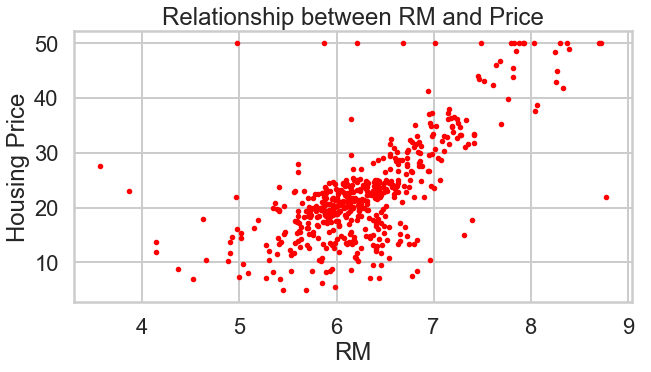

In [13]:
# your turn: scatter plot between *RM* and *PRICE*
plt.subplots(figsize=(10, 5))
plt.scatter(bos.RM, bos.PRICE, marker='.',s=50,c='r')
plt.xlabel("RM")
plt.ylabel("Housing Price")
plt.title("Relationship between RM and Price")

Text(0.5, 1.0, 'Relationship between PTRATIO and Price')

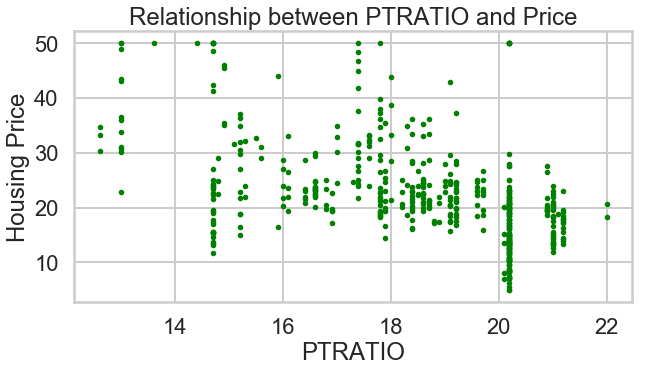

In [14]:
# your turn: scatter plot between *PTRATIO* and *PRICE*
plt.subplots(figsize=(10, 5))
plt.scatter(bos.PTRATIO, bos.PRICE, marker='.',s=50,c='g')
plt.xlabel("PTRATIO")
plt.ylabel("Housing Price")
plt.title("Relationship between PTRATIO and Price")

Text(0.5, 1.0, 'Relationship between TAX and Price')

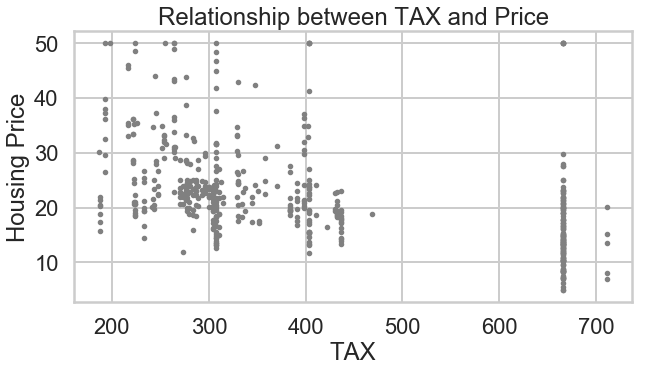

In [15]:
# your turn: create some other scatter plots
# your turn: scatter plot between *TAX* and *PRICE*
plt.subplots(figsize=(10, 5))
plt.scatter(bos.TAX, bos.PRICE, marker='.',s=50,c='grey')
plt.xlabel("TAX")
plt.ylabel("Housing Price")
plt.title("Relationship between TAX and Price")

Text(0.5, 1.0, 'Relationship between LSTAT and Price')

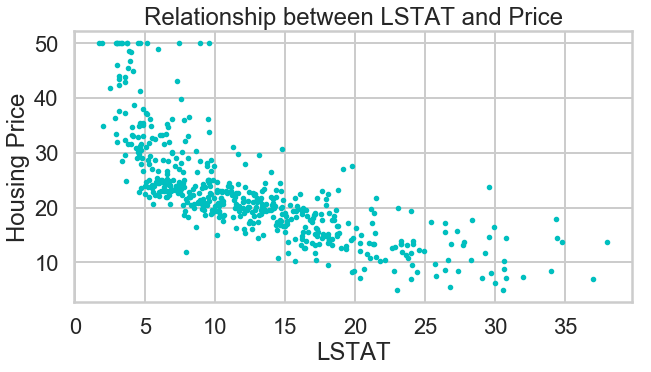

In [16]:
# your turn: scatter plot between *PTRATIO* and *PRICE*
plt.subplots(figsize=(10, 5))
plt.scatter(bos.LSTAT, bos.PRICE, marker='.',s=50,c='c')
plt.xlabel("LSTAT")
plt.ylabel("Housing Price")
plt.title("Relationship between LSTAT and Price")

### Scatterplots using Seaborn
***

[Seaborn](https://stanford.edu/~mwaskom/software/seaborn/) is a cool Python plotting library built on top of matplotlib. It provides convenient syntax and shortcuts for many common types of plots, along with better-looking defaults.

We can also use [seaborn regplot](https://stanford.edu/~mwaskom/software/seaborn/tutorial/regression.html#functions-to-draw-linear-regression-models) for the scatterplot above. This provides automatic linear regression fits (useful for data exploration later on). Here's one example below.

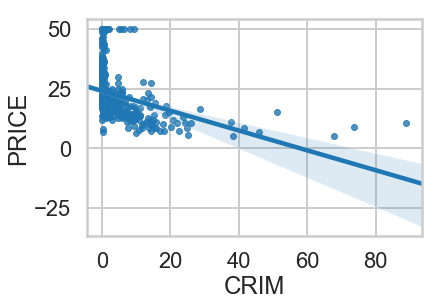

In [17]:
sns.regplot(y="PRICE", x="CRIM", data=bos, fit_reg = True,marker='.')

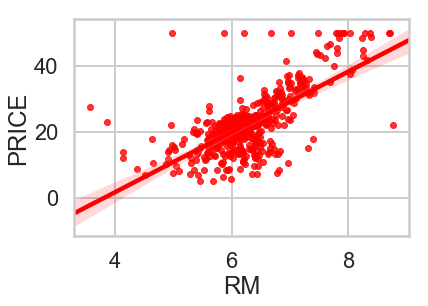

In [18]:
sns.regplot(y="PRICE", x="RM", data=bos, fit_reg = True,marker='.',color='r')

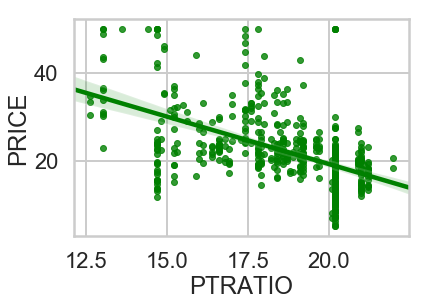

In [19]:
sns.regplot(y="PRICE", x="PTRATIO", data=bos, fit_reg = True,marker='.', color='g')

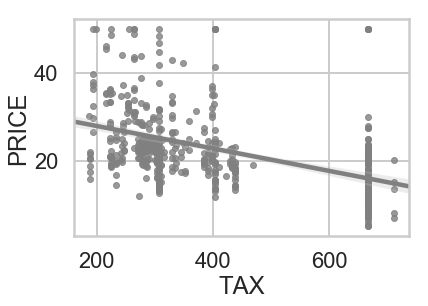

In [20]:
sns.regplot(y="PRICE", x="TAX", data=bos, fit_reg = True,marker='.',color='grey')

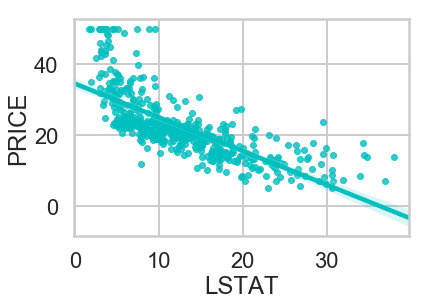

In [21]:
sns.regplot(y="PRICE", x="LSTAT", data=bos, fit_reg = True,marker='.', color='c')

### Histograms
***


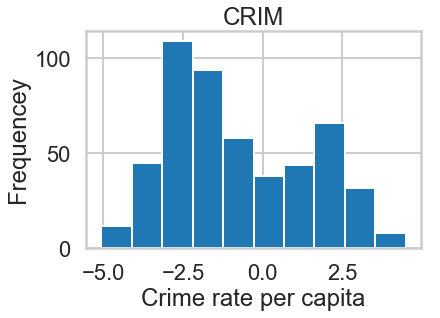

In [22]:
plt.hist(np.log(bos.CRIM))
plt.title("CRIM")
plt.xlabel("Crime rate per capita")
plt.ylabel("Frequencey")
plt.show()

<div class="span5 alert alert-info">
<h3>Part 2 Checkup Exercise Set II</h3>

<p><b>Exercise:</b> In the above histogram, we took the logarithm of the crime rate per capita. Repeat this histogram without taking the log. What was the purpose of taking the log? What do we gain by making this transformation? What do you now notice about this variable that is not obvious without making the transformation?

<p><b>Exercise:</b> Plot the histogram for *RM* and *PTRATIO* against each other, along with the two variables you picked in the previous section. We are looking for correlations in predictors here.</p>
</div>

There are two main reasons to use logarithmic scales in charts and graphs. The first is to respond to skewness towards large values; i.e., cases in which one or a few points are much larger than the bulk of the data. The second is to show percent change or multiplicative factors.
The data values are spread out better with the logarithmic scale.

In [23]:
print(np.min(np.log(bos.CRIM)),'\n',np.min(bos.CRIM))

-5.064036070823371 
 0.00632


In [24]:
print(np.max(np.log(bos.CRIM)),'\n',np.max(bos.CRIM))

4.488368918239841 
 88.9762


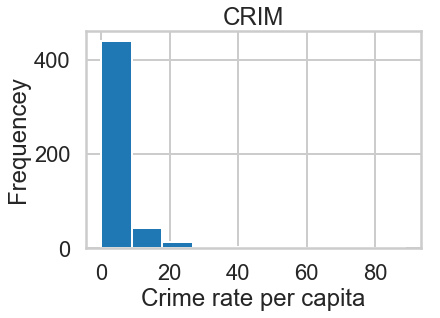

In [25]:
#your turn
plt.hist(bos.CRIM)
plt.title("CRIM")
plt.xlabel("Crime rate per capita")
plt.ylabel("Frequencey")
plt.show()

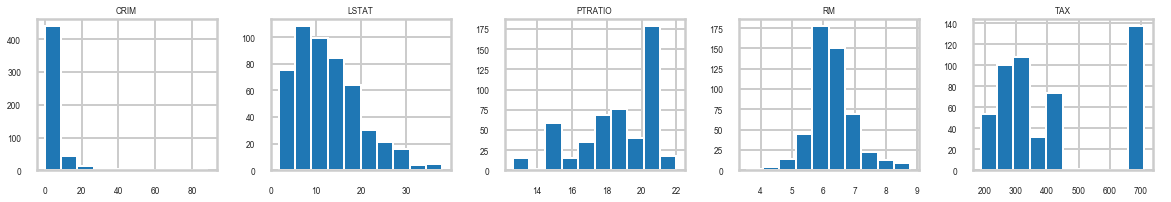

In [26]:
plt.rcParams.update({'axes.titlesize': 'small'})
plt.rcParams.update({'xtick.labelsize': 'small'})
plt.rcParams.update({'ytick.labelsize': 'small'})
plt.rcParams.update({'figure.figsize': (20,10)})
df = bos[['CRIM','RM','PTRATIO','TAX','LSTAT']]
df.hist(layout=(3,5))
plt.show()

## Part 3: Linear Regression with Boston Housing Data Example
***

Here, 

$Y$ = boston housing prices (called "target" data in python, and referred to as the dependent variable or response variable)

and

$X$ = all the other features (or independent variables, predictors or explanatory variables)

which we will use to fit a linear regression model and predict Boston housing prices. We will use the least-squares method to estimate the coefficients.  

We'll use two ways of fitting a linear regression. We recommend the first but the second is also powerful in its features.

### Fitting Linear Regression using `statsmodels`
***
[Statsmodels](http://statsmodels.sourceforge.net/) is a great Python library for a lot of basic and inferential statistics. It also provides basic regression functions using an R-like syntax, so it's commonly used by statisticians. While we don't cover statsmodels officially in the Data Science Intensive workshop, it's a good library to have in your toolbox. Here's a quick example of what you could do with it. The version of least-squares we will use in statsmodels is called *ordinary least-squares (OLS)*. There are many other versions of least-squares such as [partial least squares (PLS)](https://en.wikipedia.org/wiki/Partial_least_squares_regression) and [weighted least squares (WLS)](https://en.wikipedia.org/wiki/Iteratively_reweighted_least_squares).

In [27]:
# Import regression modules
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [28]:
# statsmodels works nicely with pandas dataframes
# The thing inside the "quotes" is called a formula, a bit on that below
m = ols('PRICE ~ RM',bos).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Sun, 07 Jul 2019   Prob (F-statistic):           2.49e-74
Time:                        07:42:08   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -34.6706      2.650    -13.084      0.0

#### Interpreting coefficients

There is a ton of information in this output. But we'll concentrate on the coefficient table (middle table). We can interpret the `RM` coefficient (9.1021) by first noticing that the p-value (under `P>|t|`) is so small, basically zero. This means that the number of rooms, `RM`, is a statisticall significant predictor of `PRICE`. The regression coefficient for `RM` of 9.1021 means that *on average, each additional room is associated with an increase of $\$9,100$ in house price net of the other variables*. The confidence interval gives us a range of plausible values for this average change, about ($\$8,279, \$9,925$), definitely not chump change. 

In general, the $\hat{\beta_i}, i > 0$ can be interpreted as the following: "A one unit increase in $x_i$ is associated with, on average, a $\hat{\beta_i}$ increase/decrease in $y$ net of all other variables."

On the other hand, the interpretation for the intercept, $\hat{\beta}_0$ is the average of $y$ given that all of the independent variables $x_i$ are 0.

####  `statsmodels` formulas
***
This formula notation will seem familiar to `R` users, but will take some getting used to for people coming from other languages or are new to statistics.

The formula gives instruction for a general structure for a regression call. For `statsmodels` (`ols` or `logit`) calls you need to have a Pandas dataframe with column names that you will add to your formula. In the below example you need a pandas data frame that includes the columns named (`Outcome`, `X1`,`X2`, ...), but you don't need to build a new dataframe for every regression. Use the same dataframe with all these things in it. The structure is very simple:

`Outcome ~ X1`

But of course we want to to be able to handle more complex models, for example multiple regression is doone like this:

`Outcome ~ X1 + X2 + X3`

In general, a formula for an OLS multiple linear regression is

`Y ~ X1 + X2 + ... + Xp`

This is the very basic structure but it should be enough to get you through the homework. Things can get much more complex. You can force statsmodels to treat variables as categorical with the `C()` function, call numpy functions to transform data such as `np.log` for extremely-skewed data, or fit a model without an intercept by including `- 1` in the formula. For a quick run-down of further uses see the `statsmodels` [help page](http://statsmodels.sourceforge.net/devel/example_formulas.html).


Let's see how our model actually fit our data. We can see below that there is a ceiling effect, we should probably look into that. Also, for large values of $Y$ we get underpredictions, most predictions are below the 45-degree gridlines. 

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set I</h3>

<p><b>Exercise:</b> Create a scatterplot between the predicted prices, available in `m.fittedvalues` (where `m` is the fitted model) and the original prices. How does the plot look? Do you notice anything interesting or weird in the plot? Comment on what you see.</p>
</div>

Pearson Correlation Coefficient of .7 shows the model predicts 70% of the prices based on number of rooms as per original prices. For every unit increase in number of rooms the housing price also increases. In the regplot below we can spot some outliers where increasing room numbers don't align with the regression line which might be due to some other attributes other the the number of rooms. Other attributes must be considered to perfect the model.

pearsonr =  0.6953599470715389
p =  2.4872288710086604e-74


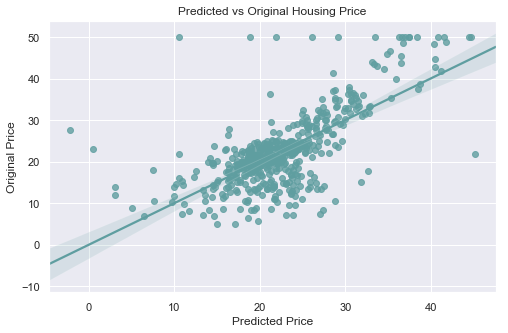

In [29]:
# your turn
sns.set(rc={'figure.figsize':(8,5)})
# get coeffs of linear fit
slope, intercept, r_value, p_value, std_err = stats.linregress(m.fittedvalues,bos.PRICE)
# use line_kws to set line label for legend
ax = sns.regplot(x=m.fittedvalues,y='PRICE', data=bos, fit_reg = True,color='cadetblue')
#,\ line_kws={'label':"y={0:.3f}x+{1:.3f}".format(slope,intercept)})
plt.xlabel("Predicted Price")
plt.ylabel("Original Price")
plt.title("Predicted vs Original Housing Price")
#ax.legend()
print('pearsonr = ',r_value)
print('p = ',p_value)
plt.show()

### Fitting Linear Regression using `sklearn`


In [30]:
from sklearn.linear_model import LinearRegression
X = bos.drop('PRICE', axis = 1)

# This creates a LinearRegression object
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

#### What can you do with a LinearRegression object? 
***
Check out the scikit-learn [docs here](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). We have listed the main functions here. Most machine learning models in scikit-learn follow this same API of fitting a model with `fit`, making predictions with `predict` and the appropriate scoring function `score` for each model.

Main functions | Description
--- | --- 
`lm.fit()` | Fit a linear model
`lm.predit()` | Predict Y using the linear model with estimated coefficients
`lm.score()` | Returns the coefficient of determination (R^2). *A measure of how well observed outcomes are replicated by the model, as the proportion of total variation of outcomes explained by the model*

#### What output can you get?

In [31]:
# Look inside lm object
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

Output | Description
--- | --- 
`lm.coef_` | Estimated coefficients
`lm.intercept_` | Estimated intercept 

### Fit a linear model
***

The `lm.fit()` function estimates the coefficients the linear regression using least squares. 

In [32]:
# Use all 13 predictors to fit linear regression model
lm.fit(X, bos.PRICE)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [33]:
lm.coef_

array([-1.08011358e-01,  4.64204584e-02,  2.05586264e-02,  2.68673382e+00,
       -1.77666112e+01,  3.80986521e+00,  6.92224640e-04, -1.47556685e+00,
        3.06049479e-01, -1.23345939e-02, -9.52747232e-01,  9.31168327e-03,
       -5.24758378e-01])

In [34]:
lm.get_params

<bound method BaseEstimator.get_params of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)>

In [35]:
lm.intercept_

36.45948838509015

In [36]:
lm.score(X,bos.PRICE)

0.7406426641094095

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set II</h3>

<p><b>Exercise:</b> How would you change the model to not fit an intercept term? Would you recommend not having an intercept? Why or why not? For more information on why to include or exclude an intercept, look [here](https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faq-what-is-regression-through-the-origin/).</p>

<p><b>Exercise:</b> One of the assumptions of the linear model is that the residuals must be i.i.d. (independently and identically distributed). To satisfy this, is it enough that the residuals are normally distributed? Explain your answer.</p>

<p><b>Exercise:</b> True or false. To use linear regression, $Y$ must be normally distributed. Explain your answer.</p>
</div>

# your turn

By changing the LinerarRegression fit_intercept parameter to False.      
Looking at the scores we get the correlation coefficients of .74 and .71 with intercept and without intercept.    
Therefore, I would recommend having an intercept as the model predicts the price more efficiently.



These terms come up in various applications in statistics. Perhaps the most common situation would be a simple      linear (OLS) regression. In that case, we say that the residuals (really the errors) should meet the following       assumptions:
    - They are independent
    - They have constant variance
    - They are normally distributed             
If they are independent and identically distributed (IID), then they must meet the first two criteria (since   differing variances constitute non-identical distributions). However, IID data need not be normally distributed. For instance, imagine a set of data where each datum is independently drawn from the same uniform distribution. Then they would be independent, and they would have the same distribution, but that distribution would not be normal.
On the other hand, a set of data can be normally distributed, but with subsets that follow different normal distributions (e.g., different means or different variances). In addition, you could have two subsets that are dependent: For example, the second subset could be generated by adding 1 to every value in the first subset. In that case, the subsets would be dependent in that, if you knew the relevant first value, you could deduce the second value. Nonetheless, both subsets would be normally distributed.
Thus, whether or not a set of data is IID is unrelated to whether they are normal.



To use linear regression, $Y$ must be normally distributed : False
The residuals are assumed to be normally distributed and the distribution of Y is not taken into account.

In [37]:
X = bos.drop('PRICE', axis = 1)
# LinearRegression with fit_intercept=False
lm_int_false = LinearRegression(fit_intercept=False)
lm_int_false.fit(X, bos.PRICE)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None,
         normalize=False)

In [38]:
predict_true = lm.predict(X)
predict_false = lm_int_false.predict(X)

Correlation Coefficient with intercept:  0.7406426641094095
Correlation Coefficient without intercept:  0.7137381380515404


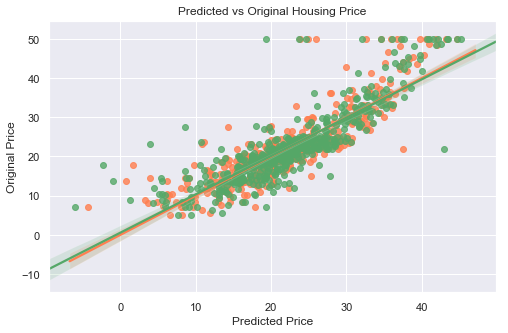

In [39]:
sns.set(rc={'figure.figsize':(8,5)})
sns.regplot(x=predict_true,y='PRICE', data=bos, fit_reg = True,color='coral')
sns.regplot(x=predict_false,y='PRICE', data=bos, fit_reg = True,color='g')
plt.xlabel("Predicted Price")
plt.ylabel("Original Price")
plt.title("Predicted vs Original Housing Price")
print('Correlation Coefficient with intercept: ',lm.score(X,bos.PRICE))
print('Correlation Coefficient without intercept: ',lm_int_false.score(X,bos.PRICE))
plt.show()

### Estimated intercept and coefficients

Let's look at the estimated coefficients from the linear model using `1m.intercept_` and `lm.coef_`.  

After we have fit our linear regression model using the least squares method, we want to see what are the estimates of our coefficients $\beta_0$, $\beta_1$, ..., $\beta_{13}$: 

$$ \hat{\beta}_0, \hat{\beta}_1, \ldots, \hat{\beta}_{13} $$



In [40]:
print('Estimated intercept coefficient: {}'.format(lm.intercept_))

Estimated intercept coefficient: 36.45948838509015


In [41]:
print('Number of coefficients: {}'.format(len(lm.coef_)))

Number of coefficients: 13


In [42]:
# The coefficients
pd.DataFrame({'features': X.columns, 'estimatedCoefficients': lm.coef_})[['features', 'estimatedCoefficients']]

,features,estimatedCoefficients
0,CRIM,-0.108011
1,ZN,0.046420
2,INDUS,0.020559
3,CHAS,2.686734
4,NOX,-17.766611
5,RM,3.809865
6,AGE,0.000692
7,DIS,-1.475567
8,RAD,0.306049
9,TAX,-0.012335


### Predict Prices 

We can calculate the predicted prices ($\hat{Y}_i$) using `lm.predict`. 

$$ \hat{Y}_i = \hat{\beta}_0 + \hat{\beta}_1 X_1 + \ldots \hat{\beta}_{13} X_{13} $$

In [43]:
# first five predicted prices
lm.predict(X)[0:5]

array([30.00384338, 25.02556238, 30.56759672, 28.60703649, 27.94352423])

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set III</h3>

<p><b>Exercise:</b> Histogram: Plot a histogram of all the predicted prices. Write a story about what you see. Describe the shape, center and spread of the distribution. Are there any outliers? What might be the reason for them? Should we do anything special with them?</p>

<p><b>Exercise:</b> Scatterplot: Let's plot the true prices compared to the predicted prices to see they disagree (we did this with `statsmodels` before).</p>

<p><b>Exercise:</b> We have looked at fitting a linear model in both `statsmodels` and `scikit-learn`. What are the advantages and disadvantages of each based on your exploration? Based on the information provided by both packages, what advantage does `statsmodels` provide?</p>
</div>

# your turn
The plots below show that the predicted prices are normally distributed with a mean of about 22 and standard deviation of about 7.9. The plot shows some outliers with prices around 0 which must be further analyzed. We can drop the outliers if it affects the predictability of our model.

They agree with the statsmodels used above as we get the same scores.

SKLearn does not automatically print the concepts or have a method like summary. So we have to print the coefficients separately. While SKLearn isn’t as intuitive for printing/finding coefficients, it’s much easier to use for cross-validation and plotting models.
While the X variable comes first in SKLearn, y comes first in statsmodels. An easy way to check your dependent variable (your y variable), is right in the model.summary(). Unlike SKLearn, statsmodels doesn’t automatically fit a constant, so you need to use the method sm.add_constant(X) in order to add a constant. Adding a constant, while not necessary, makes your line fit much better.
While coefficients are great, you can get them pretty easily from SKLearn, so the main benefit of statsmodels is the other statistics it provides. One of the assumptions of a simple linear regression model is normality of our data. 
From what I understand, the statistics in the last table are testing the normality of our data. If the Prob(Omnibus) is very small, and I took this to mean <.05 as this is standard statistical practice, then our data is probably not normal. This is a more precise way than graphing our data to determine if our data is normal.
Statsmodels also helps us determine which of our variables are statistically significant through the p-values. If our p-value is <.05, then that variable is statistically significant. This is a useful tool to tune your model. 
Since SKLearn has more useful features, I would use it to build the final model, but statsmodels is a good method to analyze the data before you put it into your model.


In [44]:
pred_prices = lm.predict(X)
print(np.mean(pred_prices),np.std(pred_prices))

22.532806324110677 7.907257740483541


Text(0, 0.5, 'Frequency')

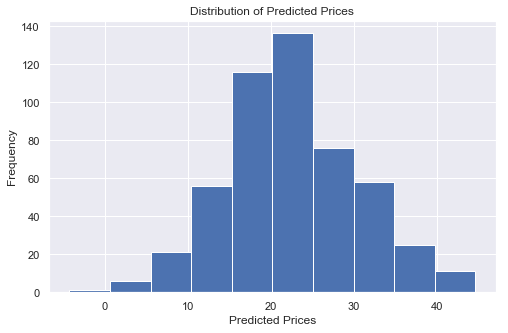

In [45]:
plt.hist(pred_prices)
plt.title("Distribution of Predicted Prices")
plt.xlabel("Predicted Prices")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

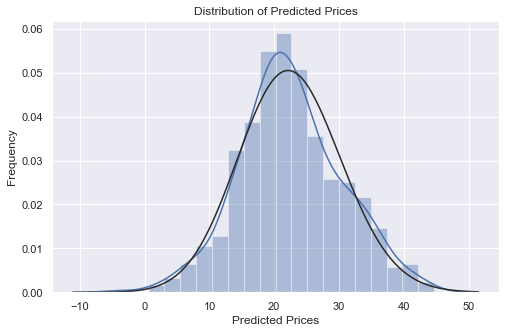

In [46]:
sns.distplot(pred_prices, hist=True,kde=True, fit=stats.gamma)
plt.title('Distribution of Predicted Prices')
plt.xlabel('Predicted Prices')
plt.ylabel('Frequency')


Text(0, 0.5, 'Original')

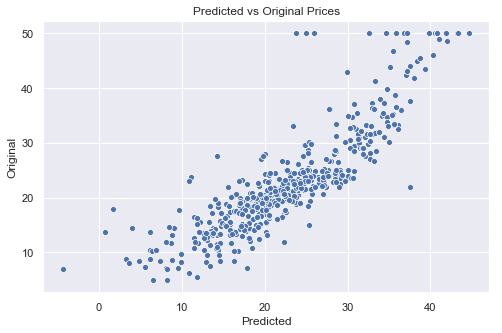

In [47]:
sns.scatterplot(pred_prices, bos.PRICE)
plt.title("Predicted vs Original Prices")
plt.xlabel("Predicted")
plt.ylabel("Original")

### Evaluating the Model: Sum-of-Squares

The partitioning of the sum-of-squares shows the variance in the predictions explained by the model and the variance that is attributed to error.

$$TSS = ESS + RSS$$

#### Residual Sum-of-Squares (aka $RSS$)

The residual sum-of-squares is one of the basic ways of quantifying how much error exists in the fitted model. We will revisit this in a bit.

$$ RSS = \sum_{i=1}^N r_i^2 = \sum_{i=1}^N \left(y_i - \left(\beta_0 + \beta_1 x_i\right)\right)^2 $$

In [48]:
print(np.sum((bos.PRICE - lm.predict(X)) ** 2))

11078.784577954977


#### Explained Sum-of-Squares (aka $ESS$)

The explained sum-of-squares measures the variance explained by the regression model.

$$ESS = \sum_{i=1}^N \left( \hat{y}_i - \bar{y} \right)^2 = \sum_{i=1}^N \left( \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) - \bar{y} \right)^2$$

In [49]:
print(np.sum((lm.predict(X) - np.mean(bos.PRICE)) ** 2))

31637.510837065056


### Evaluating the Model: The Coefficient of Determination ($R^2$)

The coefficient of determination, $R^2$, tells us the percentage of the variance in the response variable $Y$ that can be explained by the linear regression model.

$$ R^2 = \frac{ESS}{TSS} $$

The $R^2$ value is one of the most common metrics that people use in describing the quality of a model, but it is important to note that *$R^2$ increases artificially as a side-effect of increasing the number of independent variables.* While $R^2$ is reported in almost all statistical packages, another metric called the *adjusted $R^2$* is also provided as it takes into account the number of variables in the model, and can sometimes even be used for non-linear regression models!

$$R_{adj}^2 = 1 - \left( 1 - R^2 \right) \frac{N - 1}{N - K - 1} = R^2 - \left( 1 - R^2 \right) \frac{K}{N - K - 1} = 1 - \frac{\frac{RSS}{DF_R}}{\frac{TSS}{DF_T}}$$

where $N$ is the number of observations, $K$ is the number of variables, $DF_R = N - K - 1$ is the degrees of freedom associated with the residual error and $DF_T = N - 1$ is the degrees of the freedom of the total error.

### Evaluating the Model: Mean Squared Error and the $F$-Statistic
***
The mean squared errors are just the *averages* of the sum-of-squares errors over their respective degrees of freedom.

$$MSE = \frac{RSS}{N-K-1}$$

$$MSR = \frac{ESS}{K}$$

**Remember:** Notation may vary across resources particularly the use of $R$ and $E$ in $RSS/ESS$ and $MSR/MSE$. In some resources, E = explained and R = residual. In other resources, E = error and R = regression (explained). **This is a very important distinction that requires looking at the formula to determine which naming scheme is being used.**

Given the MSR and MSE, we can now determine whether or not the entire model we just fit is even statistically significant. We use an $F$-test for this. The null hypothesis is that all of the $\beta$ coefficients are zero, that is, none of them have any effect on $Y$. The alternative is that *at least one* $\beta$ coefficient is nonzero, but it doesn't tell us which one in a multiple regression:

$$H_0: \beta_i = 0, \mbox{for all $i$} \\
H_A: \beta_i > 0, \mbox{for some $i$}$$ 

$$F = \frac{MSR}{MSE} = \left( \frac{R^2}{1 - R^2} \right) \left( \frac{N - K - 1}{K} \right)$$
 
Once we compute the $F$-statistic, we can use the $F$-distribution with $N-K$ and $K-1$ degrees of degrees of freedom to get a p-value.

**Warning!** The $F$-statistic mentioned in this section is NOT the same as the F1-measure or F1-value discused in Unit 7.

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set IV</h3>

<p>Let's look at the relationship between `PTRATIO` and housing price.</p>

<p><b>Exercise:</b> Try fitting a linear regression model using only the 'PTRATIO' (pupil-teacher ratio by town) and interpret the intercept and the coefficients.</p>

<p><b>Exercise:</b> Calculate (or extract) the $R^2$ value. What does it tell you?</p>

<p><b>Exercise:</b> Compute the $F$-statistic. What does it tell you?</p>

<p><b>Exercise:</b> Take a close look at the $F$-statistic and the $t$-statistic for the regression coefficient. What relationship do you notice? Note that this relationship only applies in *simple* linear regression models.</p>
</div>

F-statisticof 175.10, p-value of 0.00<.05 and  R^2 of 0.25 shows PTRATIO is significant in the model but still shows only weak negative correlation between PTRATIO and PRICE. Also from the below statistics we can see that for every unit increase in pupil-teacher ratio the home price decreases by 2.1572.

In [50]:
from sklearn import feature_selection

def linear_regression(X, y):
    X_reshape=X.values.reshape(-1,1)
    reg = LinearRegression().fit(X_reshape, y)
    intercept = reg.intercept_
    coef = reg.coef_
    predict=reg.predict(X_reshape)
    r2 = reg.score(X_reshape, y)
    fstat,pvalue=sklearn.feature_selection.f_regression(X_reshape, y)
    try:
        sns.jointplot(X, y, kind='reg',color='peru')
    except:
        print('Cannot Plot')
    return fstat[0],r2,pvalue[0],intercept,coef,predict

Intercept:  62.34462747483265 
F-statistic: 175.1055428757603 
R^2: 0.257847318009223 
p-value: 1.6095094784340724e-34


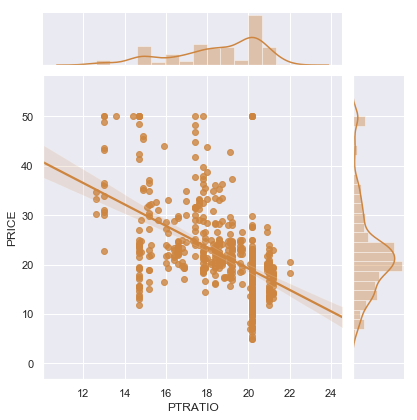

In [51]:
fstat,r2,pvalue,intercept,coef,predict=linear_regression(bos.PTRATIO, bos.PRICE)
print('Intercept: ',intercept,'\nF-statistic:',fstat,'\nR^2:',r2,'\np-value:',pvalue)

In [52]:
mdl = ols('PRICE ~ PTRATIO',bos).fit()
print(mdl.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.258
Model:                            OLS   Adj. R-squared:                  0.256
Method:                 Least Squares   F-statistic:                     175.1
Date:                Sun, 07 Jul 2019   Prob (F-statistic):           1.61e-34
Time:                        07:42:10   Log-Likelihood:                -1764.8
No. Observations:                 506   AIC:                             3534.
Df Residuals:                     504   BIC:                             3542.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     62.3446      3.029     20.581      0.0

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set V</h3>

<p>Fit a linear regression model using three independent variables</p>

<ol>
<li> 'CRIM' (per capita crime rate by town)
<li> 'RM' (average number of rooms per dwelling)
<li> 'PTRATIO' (pupil-teacher ratio by town)
</ol>

<p><b>Exercise:</b> Compute or extract the $F$-statistic. What does it tell you about the model?</p>

<p><b>Exercise:</b> Compute or extract the $R^2$ statistic. What does it tell you about the model?</p>

<p><b>Exercise:</b> Which variables in the model are significant in predicting house price? Write a story that interprets the coefficients.</p>
</div>

CRIM: R^2: 0.15, PTRATIO: R^2: 0.257, RM: R^2: 0.48 - There is a better correlation between the average number of rooms per dwelling and the price.
Since p values are equal to 0 for CRIM, RM and PTRATIO, they are statistically significant predictors of PRICE.

Intercept:  62.34462747483265 
F-statistic: 175.1055428757603 
R^2: 0.257847318009223 
p-value: 1.6095094784340724e-34


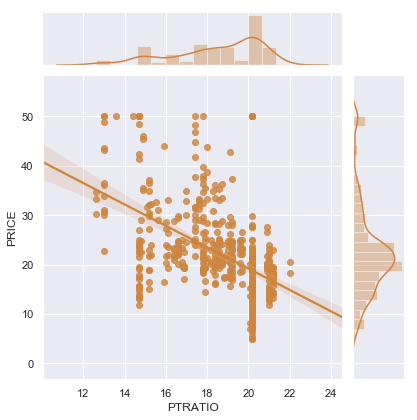

In [53]:
# your turn
fstat,r2,pvalue,intercept,coef,predict=linear_regression(bos.PTRATIO, bos.PRICE)
print('Intercept: ',intercept,'\nF-statistic:',fstat,'\nR^2:',r2,'\np-value:',pvalue)

Intercept:  24.03310617412388 
F-statistic: 89.48611475768125 
R^2: 0.15078046904975717 
p-value: 1.1739870821944483e-19


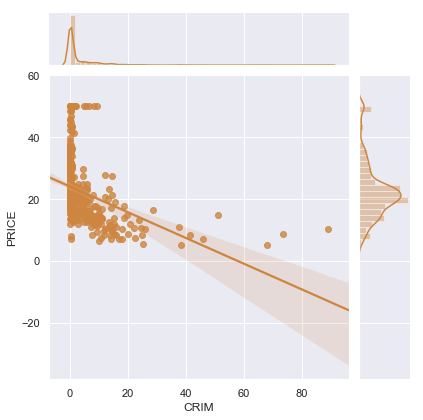

In [54]:
fstat,r2,pvalue,intercept,coef,predict=linear_regression(bos.CRIM, bos.PRICE)
print('Intercept: ',intercept,'\nF-statistic:',fstat,'\nR^2:',r2,'\np-value:',pvalue)

Intercept:  -34.67062077643857 
F-statistic: 471.846739876386 
R^2: 0.4835254559913343 
p-value: 2.4872288710084365e-74


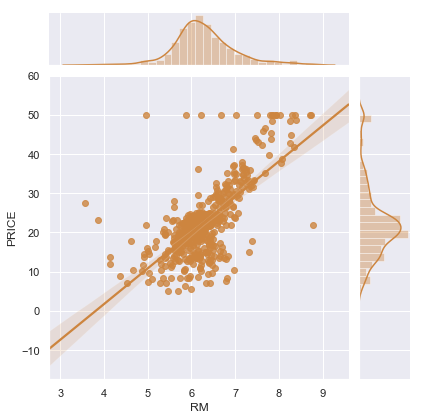

In [55]:
fstat,r2,pvalue,intercept,coef,predict=linear_regression(bos.RM, bos.PRICE)
print('Intercept: ',intercept,'\nF-statistic:',fstat,'\nR^2:',r2,'\np-value:',pvalue)

In [56]:
### STATSMODELS ###
import statsmodels.formula.api as smf
# create a fitted model with all three features
lm1 = smf.ols(formula='PRICE ~ CRIM + RM + PTRATIO', data=bos).fit()

# print the coefficients
lm1.params

Intercept   -3.370704
CRIM        -0.204961
RM           7.380411
PTRATIO     -1.069546
dtype: float64

In [57]:
### SCIKIT-LEARN ###

# create X and y
feature_cols = ['CRIM', 'RM', 'PTRATIO']
X = bos[feature_cols]
y = bos.PRICE

# instantiate and fit
lm2 = LinearRegression()
lm2.fit(X, y)

# print the coefficients
print(lm2.intercept_)
print(lm2.coef_)

-3.3707043351542687
[-0.20496083  7.3804111  -1.0695461 ]


In [58]:
# pair the feature names with the coefficients
list(zip(feature_cols, lm2.coef_))

[('CRIM', -0.20496083329583487),
 ('RM', 7.380411104480521),
 ('PTRATIO', -1.0695460988831755)]

In [59]:
mdl = ols('PRICE ~ CRIM',bos).fit()
print(mdl.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.151
Model:                            OLS   Adj. R-squared:                  0.149
Method:                 Least Squares   F-statistic:                     89.49
Date:                Sun, 07 Jul 2019   Prob (F-statistic):           1.17e-19
Time:                        07:42:12   Log-Likelihood:                -1798.9
No. Observations:                 506   AIC:                             3602.
Df Residuals:                     504   BIC:                             3610.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     24.0331      0.409     58.740      0.0

In [60]:
mdl = ols('PRICE ~ RM',bos).fit()
print(mdl.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Sun, 07 Jul 2019   Prob (F-statistic):           2.49e-74
Time:                        07:42:12   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -34.6706      2.650    -13.084      0.0

In [61]:
mdl = ols('PRICE ~ PTRATIO',bos).fit()
print(mdl.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.258
Model:                            OLS   Adj. R-squared:                  0.256
Method:                 Least Squares   F-statistic:                     175.1
Date:                Sun, 07 Jul 2019   Prob (F-statistic):           1.61e-34
Time:                        07:42:12   Log-Likelihood:                -1764.8
No. Observations:                 506   AIC:                             3534.
Df Residuals:                     504   BIC:                             3542.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     62.3446      3.029     20.581      0.0

## Part 4: Comparing Models

During modeling, there will be times when we want to compare models to see which one is more predictive or fits the data better. There are many ways to compare models, but we will focus on two.

### The $F$-Statistic Revisited

The $F$-statistic can also be used to compare two *nested* models, that is, two models trained on the same dataset where one of the models contains a *subset* of the variables of the other model. The *full* model contains $K$ variables and the *reduced* model contains a subset of these $K$ variables. This allows us to add additional variables to a base model and then test if adding the variables helped the model fit.

$$F = \frac{\left( \frac{RSS_{reduced} - RSS_{full}}{DF_{reduced} - DF_{full}} \right)}{\left( \frac{RSS_{full}}{DF_{full}} \right)}$$

where $DF_x = N - K_x - 1$ where $K_x$ is the number of variables in model $x$.

### Akaike Information Criterion (AIC)

Another statistic for comparing two models is AIC, which is based on the likelihood function and takes into account the number of variables in the model.

$$AIC = 2 K - 2 \log_e{L}$$

where $L$ is the likelihood of the model. AIC is meaningless in the absolute sense, and is only meaningful when compared to AIC values from other models. Lower values of AIC indicate better fitting models.

`statsmodels` provides the AIC in its output.

<div class="span5 alert alert-info">
<h3>Part 4 Checkup Exercises</h3>

<p><b>Exercise:</b> Find another variable (or two) to add to the model we built in Part 3. Compute the $F$-test comparing the two models as well as the AIC. Which model is better?</p>
</div>

Model1: R^2 of 0.594 and an AIC of 3232          
Model2: R^2 of 0.682, and an AIC of 3113             
With higher R^2 and low AIC Model 2 seems to be a better fitting model than Model 1.

In [62]:
def linear_regression(X, y, data=bos):    
    reg = LinearRegression().fit(X, y)
    intercept = reg.intercept_
    coef = reg.coef_
    predict=reg.predict(X)
    r2 = reg.score(X, y)
    fstat,pvalue=sklearn.feature_selection.f_regression(X, y)
    return fstat[0],r2,pvalue[0],intercept,coef,predict

In [63]:
model2 = ['CRIM', 'RM', 'PTRATIO','INDUS','LSTAT']
model1 = ['CRIM', 'RM', 'PTRATIO']
y = bos.PRICE
fstat,r2,pvalue,intercept,coef,predict=linear_regression(bos[model1], y)
print('f-statistic:',fstat,'\nR2:',r2,'\np-value:',pvalue)
m = ols('PRICE ~ '+'+'.join(model1),bos).fit()
m1_aic=m.aic
print(m.summary())

f-statistic: 89.48611475768125 
R2: 0.5943412940723471 
p-value: 1.1739870821944483e-19
                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.594
Model:                            OLS   Adj. R-squared:                  0.592
Method:                 Least Squares   F-statistic:                     245.2
Date:                Sun, 07 Jul 2019   Prob (F-statistic):           6.15e-98
Time:                        07:42:12   Log-Likelihood:                -1612.0
No. Observations:                 506   AIC:                             3232.
Df Residuals:                     502   BIC:                             3249.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------

In [64]:
fstat,r2,pvalue,intercept,coef,predict=linear_regression(bos[model2], bos.PRICE)
print('f-statistic:',fstat,'\nR2:',r2,'\np-value:',pvalue)
m = ols('PRICE ~ '+'+'.join(model2),bos).fit()
m2_aic=m.aic
print(m.summary())

f-statistic: 89.48611475768125 
R2: 0.6816655091824328 
p-value: 1.1739870821944483e-19
                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                     214.1
Date:                Sun, 07 Jul 2019   Prob (F-statistic):          8.89e-122
Time:                        07:42:12   Log-Likelihood:                -1550.6
No. Observations:                 506   AIC:                             3113.
Df Residuals:                     500   BIC:                             3139.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------


## Part 5: Evaluating the Model via Model Assumptions and Other Issues
***
Linear regression makes several assumptions. It is always best to check that these assumptions are valid after fitting a linear regression model.

<div class="span5 alert alert-danger">
<ul>
  <li>**Linearity**. The dependent variable $Y$ is a linear combination of the regression coefficients and the independent variables $X$. This can be verified with a scatterplot of each $X$ vs. $Y$ and plotting correlations among $X$. Nonlinearity can sometimes be resolved by [transforming](https://onlinecourses.science.psu.edu/stat501/node/318) one or more independent variables, the dependent variable, or both. In other cases, a [generalized linear model](https://en.wikipedia.org/wiki/Generalized_linear_model) or a [nonlinear model](https://en.wikipedia.org/wiki/Nonlinear_regression) may be warranted.</li>
  <li>**Constant standard deviation**. The SD of the dependent variable $Y$ should be constant for different values of X. We can check this by plotting each $X$ against $Y$ and verifying that there is no "funnel" shape showing data points fanning out as $X$ increases or decreases. Some techniques for dealing with non-constant variance include weighted least squares (WLS), [robust standard errors](https://en.wikipedia.org/wiki/Heteroscedasticity-consistent_standard_errors), or variance stabilizing transformations.
    </li>
  <li> **Normal distribution for errors**.  The $\epsilon$ term we discussed at the beginning are assumed to be normally distributed. This can be verified with a fitted values vs. residuals plot and verifying that there is no pattern, and with a quantile plot.
  $$ \epsilon_i \sim N(0, \sigma^2)$$
Sometimes the distributions of responses $Y$ may not be normally distributed at any given value of $X$.  e.g. skewed positively or negatively. </li>
<li> **Independent errors**.  The observations are assumed to be obtained independently.
    <ul>
        <li>e.g. Observations across time may be correlated
    </ul>
</li>
</ul>  

</div>

There are some other issues that are important investigate with linear regression models.

<div class="span5 alert alert-danger">
<ul>
  <li>**Correlated Predictors:** Care should be taken to make sure that the independent variables in a regression model are not too highly correlated. Correlated predictors typically do not majorly affect prediction, but do inflate standard errors of coefficients making interpretation unreliable. Common solutions are dropping the least important variables involved in the correlations, using regularlization, or, when many predictors are highly correlated, considering a dimension reduction technique such as principal component analysis (PCA).
  <li>**Influential Points:** Data points that have undue influence on the regression model. These points can be high leverage points or outliers. Such points are typically removed and the regression model rerun.
</ul>
</div>


<div class="span5 alert alert-info">
<h3>Part 5 Checkup Exercises</h3>

<p>Take the reduced model from Part 3 to answer the following exercises. Take a look at [this blog post](http://mpastell.com/2013/04/19/python_regression/) for more information on using statsmodels to construct these plots.</p>
    
<p><b>Exercise:</b> Construct a fitted values versus residuals plot. What does the plot tell you? Are there any violations of the model assumptions?</p>

<p><b>Exercise:</b> Construct a quantile plot of the residuals. What does the plot tell you?</p>

<p><b>Exercise:</b> What are some advantages and disadvantages of the fitted vs. residual and quantile plot compared to each other?</p>

<p><b>Exercise:</b> Identify any outliers (if any) in your model and write a story describing what these outliers might represent.</p>

<p><b>Exercise:</b> Construct a leverage plot and identify high leverage points in the model. Write a story explaining possible reasons for the high leverage points.</p>

<p><b>Exercise:</b> Remove the outliers and high leverage points from your model and run the regression again. How do the results change?</p>
</div>

From the fitted values vs residuals plot below we see that the linear regression model is pretty good in predicting prices with a few outliers.

Comparing both QQ plot and the residuals plot we can clearly see some outliers. Residuals plot gives a much better view of the deviation compared to QQ plot.

The QQ plot shows that the residuals are normally distributed. 

From the plot, it can be observed that there are some predictor variables with extreme values that are causing the leverage values to move beyond .05 while mantaining a residual range beteen 0 and 2.

Removing the outliers and high leverage points from the model and running the regression again,
we see from the summary statistics below,
R^2 of 0.729
AIC of 2935
From this we can say that the removal of outliers has improved the models performance. 
Although the reason for outliers must be analyzed before dropping so we don't miss out on valuable data. 

In [65]:
# Your turn.
red_mod = ['CRIM', 'RM', 'PTRATIO']
y = bos.PRICE
m = ols('PRICE ~ '+'+'.join(red_mod),bos).fit()
# fitted values (need a constant term for intercept)
m_fitted_y = m.fittedvalues
# model residuals
m_residuals = m.resid
# normalized residuals
m_norm_residuals = m.get_influence().resid_studentized_internal
# absolute squareroot of normalized residuals
m_norm_residuals_abs_sqrt = np.sqrt(np.abs(m_norm_residuals))
# absolute residuals
m_abs_residuals = np.abs(m_residuals)
# leverage, from statsmodels internals
m_leverage = m.get_influence().hat_matrix_diag
# cook's distance, from statsmodels internals
m_cooks = m.get_influence().cooks_distance[0]

Text(0, 0.5, 'Residual')

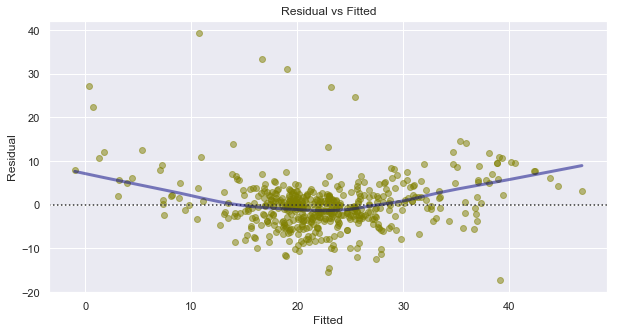

In [66]:
pl = plt.figure(1)
pl.set_figheight(5)
pl.set_figwidth(10)
pl.axes[0] = sns.residplot(m_fitted_y, y, data=bos,color='olive', lowess=True, scatter_kws={'alpha': 0.5},\
                                  line_kws={'color': 'navy', 'lw': 3, 'alpha': 0.5})
pl.axes[0].set_title('Residual vs Fitted')
pl.axes[0].set_xlabel('Fitted')
pl.axes[0].set_ylabel('Residual')

Text(0, 0.5, 'Residuals')

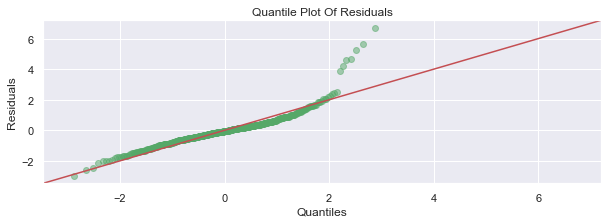

In [67]:
from statsmodels.graphics.gofplots import ProbPlot
q = ProbPlot(m_norm_residuals)
pl = q.qqplot(line='45', alpha=0.5, color='g', lw=1)
pl.set_figheight(3)
pl.set_figwidth(10)
pl.axes[0].set_title('Quantile Plot Of Residuals')
pl.axes[0].set_xlabel('Quantiles')
pl.axes[0].set_ylabel('Residuals')

Text(0, 0.5, 'Residuals')

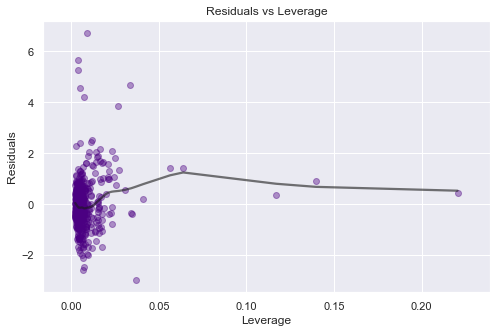

In [68]:
plt.scatter(m_leverage, m_norm_residuals,color='indigo', alpha=0.4)
sns.regplot(m_leverage, m_norm_residuals, scatter=False, ci=False, lowess=True,\
            line_kws={'color': 'k', 'alpha': 0.6})
plt.title('Residuals vs Leverage')
plt.xlabel('Leverage')
plt.ylabel('Residuals')

In [69]:
oso = m.outlier_test()
oso

,student_resid,unadj_p,bonf(p)
0,-0.817584,0.413983,1.0
1,-0.574819,0.565672,1.0
2,0.696965,0.486148,1.0
3,0.874982,0.382003,1.0
4,1.167614,0.243518,1.0
5,0.787266,0.431498,1.0
6,-0.311681,0.755413,1.0
7,0.205772,0.837052,1.0
8,-0.922190,0.356874,1.0
9,-0.982697,0.326231,1.0


In [70]:
lg = oso.nlargest(7, 'student_resid')
outliers = list(lg.index)
# pick top 5 leverage points
model_cooks = m.get_influence().cooks_distance[0]
leverage_top_5 = list(np.flip(np.argsort(model_cooks), 0)[:5])
to_remove = set(outliers  + leverage_top_5)
to_remove = list(to_remove)
bos2 = bos.drop(bos.index[to_remove])

In [71]:
m_o = ols('PRICE ~ CRIM + RM + PTRATIO', bos2).fit()

In [72]:
y = bos2.PRICE
# fitted values (need a constant term for intercept)
m_fitted_y = m_o.fittedvalues
# model residuals
m_residuals = m_o.resid
# normalized residuals
m_norm_residuals = m_o.get_influence().resid_studentized_internal
# absolute squareroot of normalized residuals
m_norm_residuals_abs_sqrt = np.sqrt(np.abs(m_norm_residuals))
# absolute residuals
m_abs_residuals = np.abs(m_residuals)
# leverage, from statsmodels internals
m_leverage = m_o.get_influence().hat_matrix_diag
# cook's distance, from statsmodels internals
m_cooks = m_o.get_influence().cooks_distance[0]

Text(0, 0.5, 'Residual')

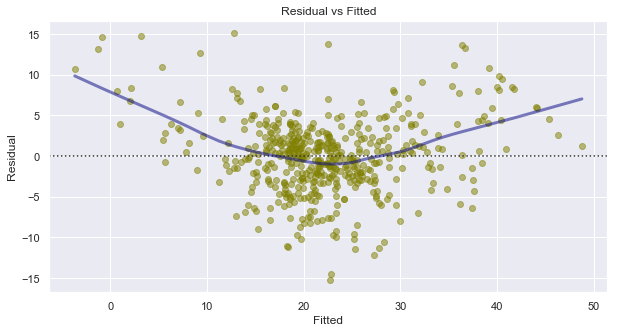

In [73]:
pl = plt.figure(1)
pl.set_figheight(5)
pl.set_figwidth(10)
pl.axes[0] = sns.residplot(m_fitted_y, y, data=bos2,color='olive', lowess=True, scatter_kws={'alpha': 0.5},\
                                  line_kws={'color': 'navy', 'lw': 3, 'alpha': 0.5})
pl.axes[0].set_title('Residual vs Fitted')
pl.axes[0].set_xlabel('Fitted')
pl.axes[0].set_ylabel('Residual')

Text(0, 0.5, 'Residuals')

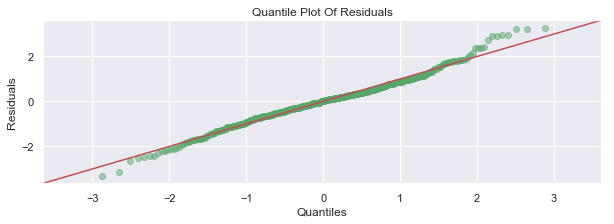

In [74]:
q = ProbPlot(m_norm_residuals)
pl = q.qqplot(line='45', alpha=0.5, color='g', lw=1)
pl.set_figheight(3)
pl.set_figwidth(10)
pl.axes[0].set_title('Quantile Plot Of Residuals')
pl.axes[0].set_xlabel('Quantiles')
pl.axes[0].set_ylabel('Residuals')

Text(0, 0.5, 'Residuals')

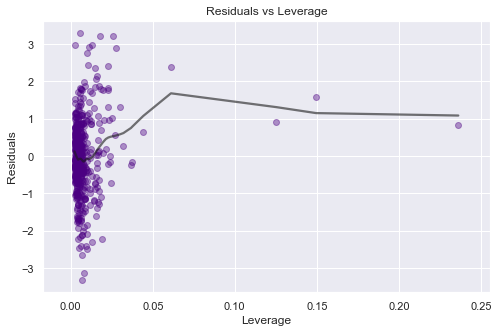

In [75]:
plt.scatter(m_leverage, m_norm_residuals,color='indigo', alpha=0.4)
sns.regplot(m_leverage, m_norm_residuals, scatter=False, ci=False, lowess=True,\
            line_kws={'color': 'k', 'alpha': 0.6})
plt.title('Residuals vs Leverage')
plt.xlabel('Leverage')
plt.ylabel('Residuals')

In [76]:
print(m_o.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.729
Model:                            OLS   Adj. R-squared:                  0.728
Method:                 Least Squares   F-statistic:                     443.0
Date:                Sun, 07 Jul 2019   Prob (F-statistic):          1.73e-139
Time:                        07:42:14   Log-Likelihood:                -1463.4
No. Observations:                 497   AIC:                             2935.
Df Residuals:                     493   BIC:                             2952.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -8.5955      3.282     -2.619      0.0